# Introduction

When I did my course work for Business Analytics course, the statistics course involved a lecture on showing how to solve Linear Regression using just excel and matrix multiplication using linear algebra which solves for oridinary least squares (OLS).

Since then I have forgotten how to solve it using matrix multiplication and I wanted learn how it is done as well demonstrate to others.

### This is a series of notebooks which will go through the techniques that is essential for the statistics and will be useful for all machine learning practitioners. It is a series of 6 notebooks:

1. [Sampling and sample distribution](https://www.kaggle.com/gireeshs/learn-statistics-1-sampling-sample-distribution)
2. [Confidence intervals](https://www.kaggle.com/gireeshs/learn-statistics-2-confidence-interval)
3. [WIP] Hypothesis testing
4. [WIP] Comparison of two populations
5. [WIP] Analysis of variance (ANOVA)
6. [This notebook]  [Linear regression basics with matrix multiplication](https://www.kaggle.com/gireeshs/diy-from-scratch-linearregression-only-using-numpy)

### How to use this notebook:
1. See this [youtube video](https://www.youtube.com/watch?v=Lx6CfgKVIuE) which gives the intution for how this is solved. I have followed the equations and the solutions given in that youtube video and solved it using numpy
2. Fork this notebook and follow along each step with understanding

Sorry for not usng Latex for math equations, I had my notes on one note, so it was easier for me to put screenshots in this notebook.

### Sections:
1. [Math behind solving Linear Regression using Matrix Multiplication](https://www.kaggle.com/gireeshs/diy-build-linear-regression-with-linear-algebra?scriptVersionId=39808155#Part-1:-Math-behind-solving-Linear-Regression-using-Matrix-Multiplication:)
2. [Solving simple linear regression](https://www.kaggle.com/gireeshs/diy-build-linear-regression-with-linear-algebra?scriptVersionId=39808155#Part-2:-Solving-a-simple-linear-regression:)
3. [Multiple linear regression](https://www.kaggle.com/gireeshs/diy-build-linear-regression-with-linear-algebra?scriptVersionId=39808155#Part-3:-Multiple-linear-regression)
4. [Calculation for r-square value](https://www.kaggle.com/gireeshs/diy-build-linear-regression-with-linear-algebra?scriptVersionId=39808155#Part-4:-Calculation-for-r-square-value:)
5. Conclusion
6. References

Please upvote this notebook if you found useful and/or informative!

# Part 1: Math behind solving Linear Regression using Matrix Multiplication:

Find the best line through a set of data points: 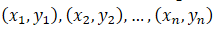


### What does best mean?

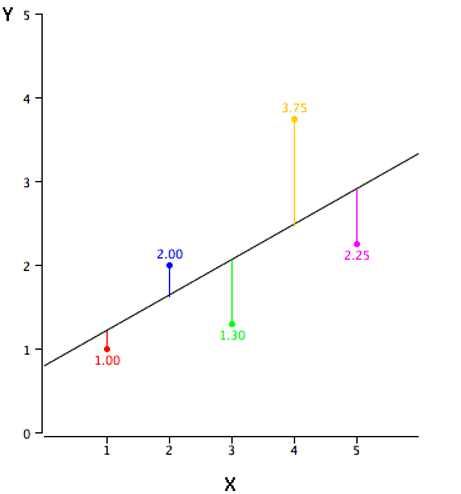

The best mean that we have to reduce the error (ε) which is a perpendicular line between the regression line and the data point (x)

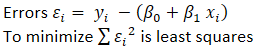

OLS gives us the closed from solution in the form of the normal equations. Minimizing this sum of squared deviations is why the problem is called the Least Squares problem.

To formulate this as a matrix problem, we can write it as:

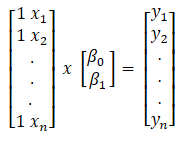

Such that: 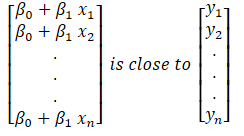

Consider linear regression equation: 

Muliplying by transpose of the X matrix on both the sides: 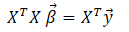

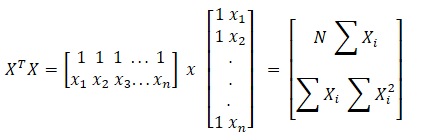

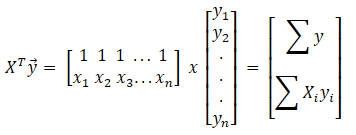

So, with the above equations we can calculate the intercept and coefficients with the equation:
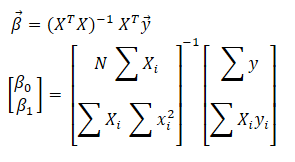

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings('ignore')

<hr>

# Part 2: Solving a simple linear regression:

Let us find the best line using least square for the set of data points: (1, 1), (2, 3), (3, 3), (4, 5)

Here the X = [1, 2, 3, 4] and y = [1, 3, 3, 5]


But we have to convert the X into a matrix so that we can have the β0 which is the intercept
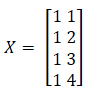

In [ ]:
X = np.matrix([[1, 1], 
               [1, 2],
              [1, 3],
              [1, 4]])
X

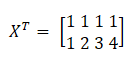

In [ ]:
XT = np.matrix.transpose(X)
XT

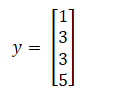

In [ ]:
y = np.matrix([[1], 
               [3],
              [3],
              [5]])
y

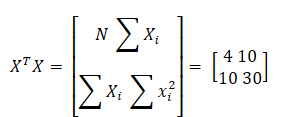

In [ ]:
XT_X = np.matmul(XT, X)
XT_X

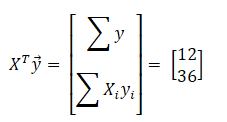

In [ ]:
XT_y = np.matmul(XT, y)
XT_y

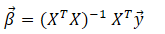

In [ ]:
betas = np.matmul(np.linalg.inv(XT_X), XT_y)
betas

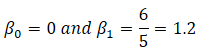

The best line is given by the equation y = 0 + 1.2 X

Ofcourse we can verify this with fitting it into a model as below.

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression().fit(X = np.array([1, 2, 3, 4]).reshape(-1, 1), y = [1, 3, 3, 5])
print("The intercept is: ", str(regressor.intercept_), ". Which is almost 0.")
print("The coefficient is: ", str(regressor.coef_))

<hr>

# Part 3: Multiple linear regression

As we have seen for the simple linear regression part, the multiple linear regression is similar to that of the simple linear regression, but with more X variables, and hence we will have as many β as there are number of X variables.

The procedure for calculation for β is:
1. Add a first column with all 1's for the intercept
2. Take the transpose of X matrix
3. Multiply  X transpose multipled X matrices
4. Find the inverse of this matrix
5. Multiply X transpose multipled y matrix
6. Multiply both the matrices to find the intercept and the coefficient

### First I have done all the steps in an excel worksheet. The excel is available on [Google Drive here](https://docs.google.com/spreadsheets/d/10zoOfiQLryz0Y7T1Zbd1grvOSdDGEgEEyECZ5sVyKJ8/edit?usp=sharing).

Please download the google sheet, since there are some formatting issues on google drive that does not display the formulas correctly.

I have imported the data and taken only the first 300 rows for this analysis. Though this will work with any number of rows, since I did this first on excel worksheets before converting into python program, I felt comfortable to work with 300 records on the excel.

#### Step 1: Adding a column with intercept

In [ ]:
data_vw = pd.read_csv("/kaggle/input/used-car-dataset-ford-and-mercedes/vw.csv")
data_vw = data_vw[:300]
data_vw["Intercept"] = 1
data_vw = data_vw[["Intercept", "year", "mileage", "tax", "mpg", "engineSize", "price"]]
print(data_vw.shape)
data_vw.head()

In [ ]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
cross_tab = np.matmul(np.matrix.transpose(data_vw.values), data_vw.values)
cross_tab

### Let us interpret what that matrix is:

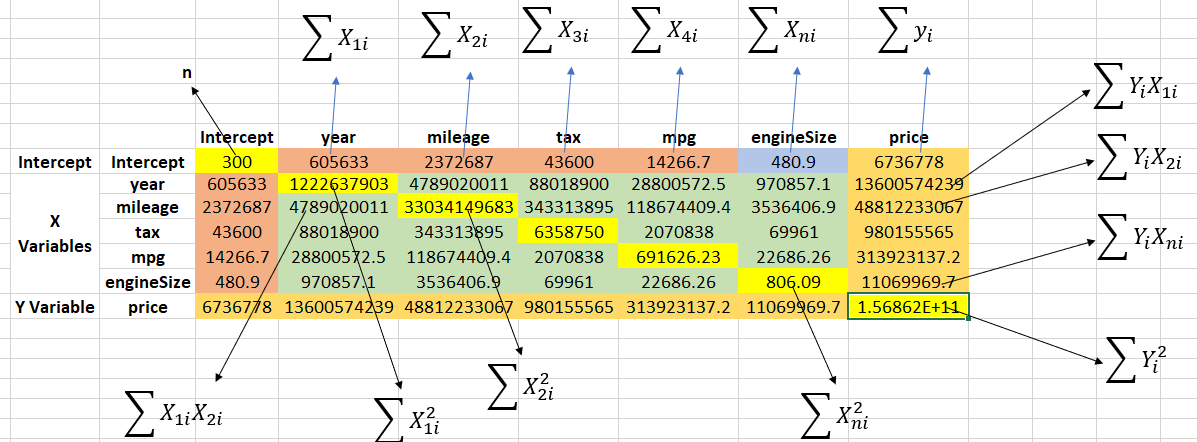

In [ ]:
X = data_vw[["Intercept", "year", "mileage", "tax", "mpg", "engineSize"]].values
y = data_vw[["price"]].values

#### Step 2: Taking the transpose of X matrix

In [ ]:
XT = np.matrix.transpose(X)

#### Step 3: Multiply X transpose multipled X matrices

What we get from excel is:
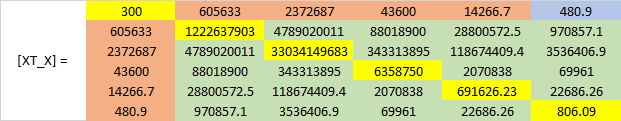

In [ ]:
XT_X = np.matmul(XT, X)
XT_X

#### Step 4: Find the inverse of this matrix

In [ ]:
XT_X_inv = np.linalg.inv(XT_X)
XT_X_inv

#### Step 5: Multiply X transpose multipled y matrix

In [ ]:
XT_y = np.matmul(XT, y)
XT_y

#### Step 6: Multiply both the matrices to find the intercept and the coefficient

In [ ]:
betas = np.matmul(XT_X_inv, XT_y)
betas

We can verify this with SM OLS below:

In [ ]:
import statsmodels.api as sm

regressor = sm.OLS(y, X).fit()
print(regressor.summary())

<hr>

# Part 4: Calculation for r-square value:

If you have followed along till untill here, what follows will also be quite simple.

For any regression problem, finding just the interecept and the co-efficients is never good enough, we need to know how good the fit is.

**The multiple coefficient of determination R2 measures the proportion of the variation in the dependent variable that is explained by the combination of the independent variables in the multiple regression model:**

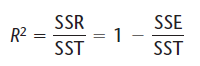

The calculstion for SST is:
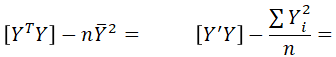

We can take these values from the cross_tab variable above

In [ ]:
yT_y = cross_tab[-1:, -1:]
n = cross_tab[:1, :1]
y_bar_square = np.square(cross_tab[:1, -1:])

SST = yT_y - (y_bar_square / n)
SST

SSR is given by:
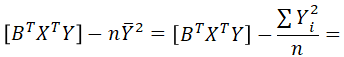

In [ ]:
n = cross_tab[:1, :1]
y_bar_square = np.square(cross_tab[:1, -1:])

SSR = np.sum(np.multiply(betas, XT_y)) - (y_bar_square / n)
SSR

In [ ]:
r_square = SSR / SST
r_square

Which is the value that we get out of the sm.ols() method.

<hr>

# Conclusion

In this notebook, I have demonstrated how to solve a simple and multiple linear regression using just numpy and linear regression.
Though most of them would never need to use this with availability of sophisticated packages, it is always cool to solve something from scratch to learn the intution behind the algorithms

[Link to medium article of this notebook.](https://towardsdatascience.com/building-linear-regression-least-squares-with-linear-algebra-2adf071dd5dd)

Please upvote this notebook if you found this useful or informative for you!

## Please visit my other notebooks on statistics here:

1. [Sampling and sample distribution](https://www.kaggle.com/gireeshs/learn-statistics-1-sampling-sample-distribution)
2. [Confidence intervals](https://www.kaggle.com/gireeshs/learn-statistics-2-confidence-interval)
3. [WIP] Hypothesis testing
4. [WIP] Comparison of two populations
5. [WIP] Analysis of variance (ANOVA)
6. [This notebook]  [Linear regression basics with matrix multiplication](https://www.kaggle.com/gireeshs/diy-from-scratch-linearregression-only-using-numpy)

# References:
1. https://www.youtube.com/watch?v=Lx6CfgKVIuE
2. Complete business statistics book
3. My course work for [ISB CBA](https://www.isb.edu/en/study-isb/advanced-management-programmes/ampba.html)
4. https://towardsdatascience.com/qr-matrix-factorization-15bae43a6b2
5. https://en.wikipedia.org/wiki/Ordinary_least_squares

Image
http://onlinestatbook.com/2/regression/intro.html